In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

importer la "data" du google drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importer les bibliotheques à utiliser

In [ ]:
df = pd.read_csv("data/train.csv")

le fichier d'entrainement

In [ ]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
target   = df["label"]
featrues = df.drop(labels=["label"], axis = 1)

la definition des parametres target et feature  

In [ ]:
from sklearn.model_selection import train_test_split
X, X_val, Y, Y_val = train_test_split(featrues, target, test_size=0.2, stratify=target)

importer la methode train_test_split qui aide à bien classifier les données

In [ ]:
def display_number(x):
    plt.imshow(np.asarray(x).reshape((28, 28)), cmap='gray')

simple méthode pour afficher un exemple de nombre

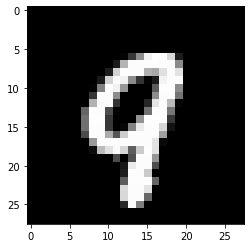

In [ ]:
display_number(X.iloc[0])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X     = scaler.transform(X)
X_val = scaler.transform(X_val)

standarisation des données

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

utilisation de la méthode PCA pour minimiser une grande quantité de donnée

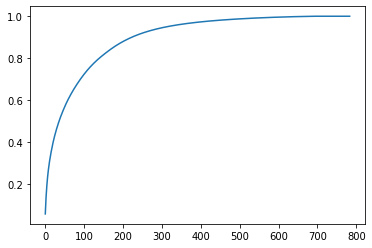

In [ ]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_variance)

In [ ]:
threshold = 0.9
pca = PCA(n_components = threshold)
pca.fit(X)

X     = pca.transform(X)
X_val = pca.transform(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def Display_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()

affichage de la matrice de confusion

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

importer la méthode de regression logistique

In [ ]:
param_grid = {"C": np.logspace(-3,3,7),
              "penalty": ["l1","l2"],
              "solver": ["saga"]} 

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=4)
grid.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['saga']})

In [ ]:
grid.best_params_, grid.best_score_

({'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}, 0.9153571428571429)

In [ ]:
model = LogisticRegression(C=100.0, penalty='l1', solver='saga')
model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100.0, penalty='l1', solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.9122619047619047

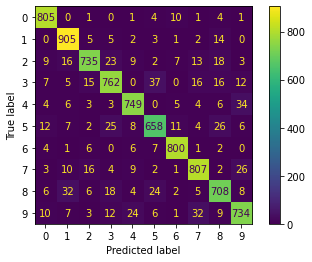

In [ ]:
Display_confusion_matrix(Y_val, Y_pred, model.classes_)

## K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': [5, 15, 30]} 
  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=4)
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [5, 15, 30]})

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 5}, 0.9438095238095239)

In [ ]:
model = KNeighborsClassifier()
model.fit(X, Y)

KNeighborsClassifier()

In [ ]:
Y_pred = model.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.9476190476190476

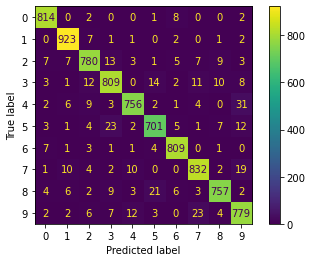

In [ ]:
Display_confusion_matrix(Y_val, Y_pred, model.classes_)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 7, 11],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(n_jobs=4), param_grid, cv=5, n_jobs=4, verbose=3)
grid.fit(X, Y)

In [ ]:
grid.best_params_, grid.best_score_

({'criterion': 'entropy',
  'max_depth': 11,
  'max_features': 'auto',
  'n_estimators': 400},
 0.9233035714285714)

In [ ]:
model = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=400, n_jobs=4)
model.fit(X, Y)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=400,
                       n_jobs=4)

In [ ]:
Y_pred = model.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.9220238095238096

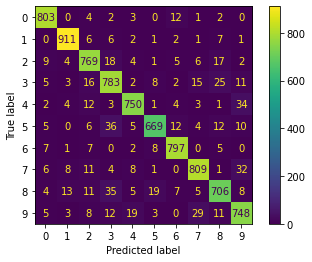

In [ ]:
Display_confusion_matrix(Y_val, Y_pred, model.classes_)

## Linear Support Vector Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=4)
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

utilisation de la cross-validation

In [ ]:
grid.best_params_, grid.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9670833333333334)

In [ ]:
model = SVC(C=10, gamma=0.001, kernel='rbf')
model.fit(X, Y)

SVC(C=10, gamma=0.001)

In [ ]:
Y_pred = model.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.9702380952380952

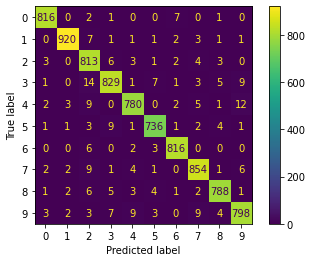

In [ ]:
Display_confusion_matrix(Y_val, Y_pred, model.classes_)

### Submission

In [ ]:
X_tot = np.concatenate((X, X_val), axis=0)
Y_tot = np.concatenate((Y, Y_val), axis=0)

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10, gamma=0.001, kernel='rbf')
model.fit(X_tot, Y_tot)

SVC(C=10, gamma=0.001)

In [ ]:
df = pd.read_csv("data/test.csv")

In [ ]:
def display_prediction(model, x):
    x_scaled  = scaler.transform(x.reshape(1, -1))
    x_reduced = pca.transform(x_scaled)
    print(f"Prediction : {model.predict(x_reduced)}")
    display_number(x)

fonction de test

Prediction : [7]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


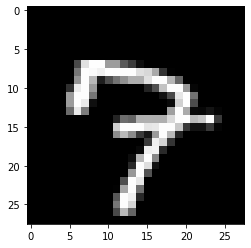

In [ ]:
display_prediction(model, np.asarray(df.iloc[5]))

Prediction : [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


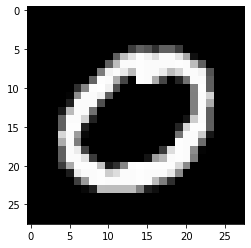

In [ ]:
display_prediction(model, np.asarray(df.iloc[8]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Prediction : [1]


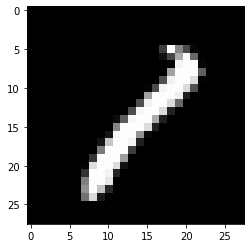

In [ ]:
display_prediction(model, np.asarray(df.iloc[22]))

In [ ]:
scaler = StandardScaler()
scaler.fit(featrues)

scaled_featrues = scaler.transform(featrues)
X_test          = scaler.transform(df)

In [ ]:
pca = PCA(n_components=224)
pca.fit(scaled_featrues)

X_test = pca.transform(X_test)
Y_pred = model.predict(X_test)

In [ ]:
df_sub = pd.DataFrame(Y_pred)
df_sub.index.name='ImageId'
df_sub.index+=1
df_sub.columns=['Label']
df_sub.to_csv('data/results.csv', header=True)